In [13]:
import pandas as pd
import numpy as np

MADHAN CODE

In [14]:
file_path = '/Users/madhan/Downloads/fireIncident.csv'
df = pd.read_csv(file_path)

/var/folders/kc/2w76g5s10jqb04n4jch3g8k80000gn/T/ipykernel_33713/4158466111.py:2: DtypeWarning: Columns (9,10,11,12,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [15]:
print(df.head())

   _id incident_number  exposure_number  alarm_date alarm_time incident_type  \
0    1      24-0070816                0  2024-09-28   00:05:43           744   
1    2      24-0070817                0  2024-09-28   00:20:29           553   
2    3      24-0070818                0  2024-09-28   00:23:30           424   
3    4      24-0070819                0  2024-09-28   00:48:17           735   
4    5      24-0070821                0  2024-09-28   00:56:51           553   

                           incident_description  estimated_property_loss  \
0  Detector activation, no fire - unintentional                      0.0   
1                                Public service                      0.0   
2                      Carbon monoxide incident                      0.0   
3       Alarm system sounded due to malfunction                      0.0   
4                                Public service                      0.0   

   estimated_content_loss district  ... street_number street_p

In [16]:
# Check for missing values
print(df.isnull().sum())

_id                             0
incident_number                 0
exposure_number                 0
alarm_date                      0
alarm_time                      0
incident_type                   0
incident_description            1
estimated_property_loss         0
estimated_content_loss          0
district                        0
city_section                25931
neighborhood                25931
zip                             0
property_use                22916
property_description        23958
street_number               59423
street_prefix              513825
street_name                    44
street_suffix              535143
street_type                 14031
address_2                  363643
xstreet_prefix             534456
xstreet_name               484275
xstreet_suffix             536831
xstreet_type               485640
dtype: int64


In [17]:
# Check for duplicate records
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [18]:
# Summary statistics
print(df.describe())

                 _id  exposure_number  estimated_property_loss  \
count  536871.000000    536871.000000             5.368710e+05   
mean   268436.000000         0.000916             8.046274e+02   
std    154981.452523         0.054788             7.092801e+04   
min         1.000000         0.000000             0.000000e+00   
25%    134218.500000         0.000000             0.000000e+00   
50%    268436.000000         0.000000             0.000000e+00   
75%    402653.500000         0.000000             0.000000e+00   
max    536871.000000        11.000000             4.500000e+07   

       estimated_content_loss  
count            5.368710e+05  
mean             1.407066e+02  
std              5.693802e+03  
min              0.000000e+00  
25%              0.000000e+00  
50%              0.000000e+00  
75%              0.000000e+00  
max              2.000000e+06  


In [19]:
# Convert alarm_date to datetime format
df['alarm_date'] = pd.to_datetime(df['alarm_date'], errors='coerce')


In [20]:
# Convert numerical columns with mixed types to numeric
df['zip'] = pd.to_numeric(df['zip'], errors='coerce')
df['street_number'] = pd.to_numeric(df['street_number'], errors='coerce')

In [21]:
# Fill missing values for categorical columns with 'Unknown'
# Fill missing values using dictionary-based method to avoid FutureWarning
df.fillna({
    'city_section': 'Unknown',
    'neighborhood': 'Unknown',
    'property_use': 'Unknown',
    'property_description': 'Unknown',
    'street_prefix': 'Not Provided',
    'street_name': 'Not Provided',
    'street_suffix': 'Not Provided',
    'street_type': 'Not Provided',
    'address_2': 'Not Provided',
    'xstreet_prefix': 'Not Provided',
    'xstreet_name': 'Not Provided',
    'xstreet_suffix': 'Not Provided',
    'xstreet_type': 'Not Provided'
}, inplace=True)


In [22]:
# Fill missing values for estimated losses with 0
df['estimated_property_loss'] = df['estimated_property_loss'].fillna(0)
df['estimated_content_loss'] = df['estimated_content_loss'].fillna(0)

# Recheck missing values after cleanup
print(df.isnull().sum())


_id                            0
incident_number                0
exposure_number                0
alarm_date                     0
alarm_time                     0
incident_type                  0
incident_description           1
estimated_property_loss        0
estimated_content_loss         0
district                       0
city_section                   0
neighborhood                   0
zip                            2
property_use                   0
property_description           0
street_number              85100
street_prefix                  0
street_name                    0
street_suffix                  0
street_type                    0
address_2                      0
xstreet_prefix                 0
xstreet_name                   0
xstreet_suffix                 0
xstreet_type                   0
dtype: int64


/var/folders/kc/2w76g5s10jqb04n4jch3g8k80000gn/T/ipykernel_33713/1322567213.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_incidents.index, y=top_incidents.values, palette="viridis")


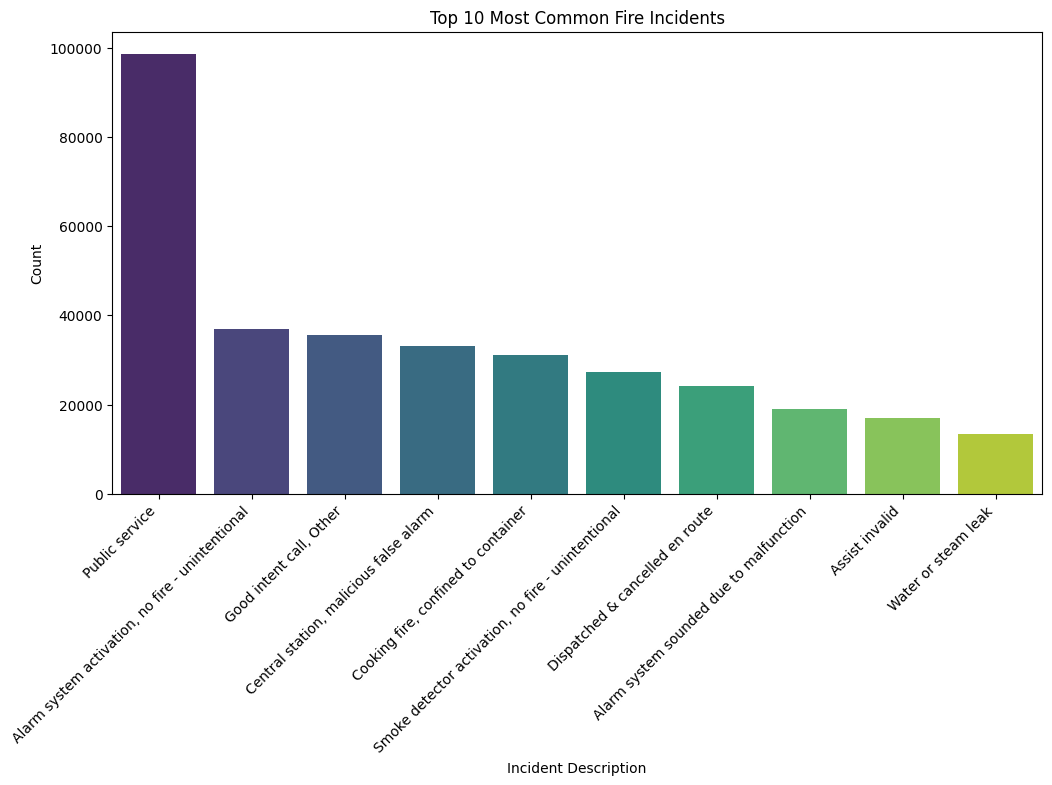

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Ensure incident_description is correctly mapped to incident_type
incident_mapping = df[['incident_type', 'incident_description']].drop_duplicates().set_index('incident_type')['incident_description']

# Get the top 10 incident types
top_incidents = df['incident_type'].value_counts().nlargest(10)

# Map incident type numbers to descriptions
top_incidents.index = top_incidents.index.map(incident_mapping)

# Plot the bar chart with incident descriptions
plt.figure(figsize=(12, 6))
sns.barplot(x=top_incidents.index, y=top_incidents.values, palette="viridis")
plt.xlabel("Incident Description")
plt.ylabel("Count")
plt.title("Top 10 Most Common Fire Incidents")
plt.xticks(rotation=45, ha='right')  # Rotate for better visibility
plt.show()

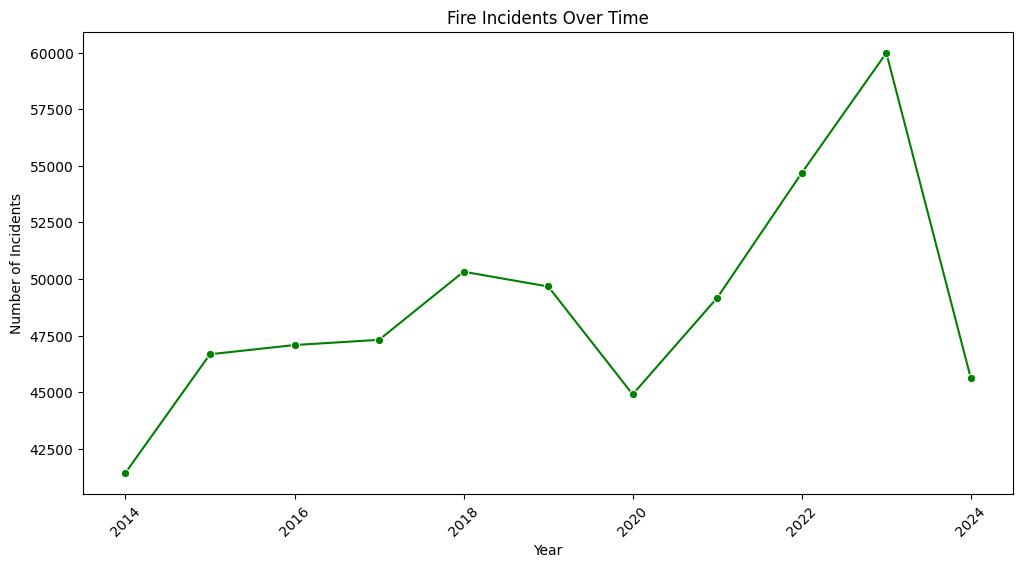

In [24]:
# Fire incidents over time
df['year'] = df['alarm_date'].dt.year
yearly_incidents = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_incidents.index, y=yearly_incidents.values, marker='o', color="green")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Fire Incidents Over Time")
plt.xticks(rotation=45)
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [30]:
# Sample a smaller portion of data for efficiency
df_sample = df.sample(n=50000, random_state=42).copy()

# Create a new column 'total_loss' by adding property and content loss
df_sample["total_loss"] = df_sample["estimated_property_loss"] + df_sample["estimated_content_loss"]

# Drop rows where 'total_loss' is 0
df_sample = df_sample[df_sample["total_loss"] > 0]

# Define target variable
threshold = df_sample["total_loss"].median()
df_sample["severity"] = (df_sample["total_loss"] > threshold).astype(int)

# Selecting relevant features (excluding individual loss columns)
features = ["incident_description", "district", "total_loss"]
df_sample = df_sample[features + ["severity"]].dropna()

# Convert categorical columns to string type
df_sample["incident_description"] = df_sample["incident_description"].astype(str)
df_sample["district"] = df_sample["district"].astype(str)

In [31]:
df_sample.shape

(1315, 4)

In [32]:
# Apply Label Encoding
label_encoders = {}
for col in ["incident_description", "district"]:
    le = LabelEncoder()
    df_sample[col] = le.fit_transform(df_sample[col])
    label_encoders[col] = le

# Splitting data
X = df_sample.drop(columns=["severity"])
y = df_sample["severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(report)

Accuracy: 0.7300
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       138
           1       0.79      0.59      0.68       125

    accuracy                           0.73       263
   macro avg       0.74      0.72      0.72       263
weighted avg       0.74      0.73      0.72       263



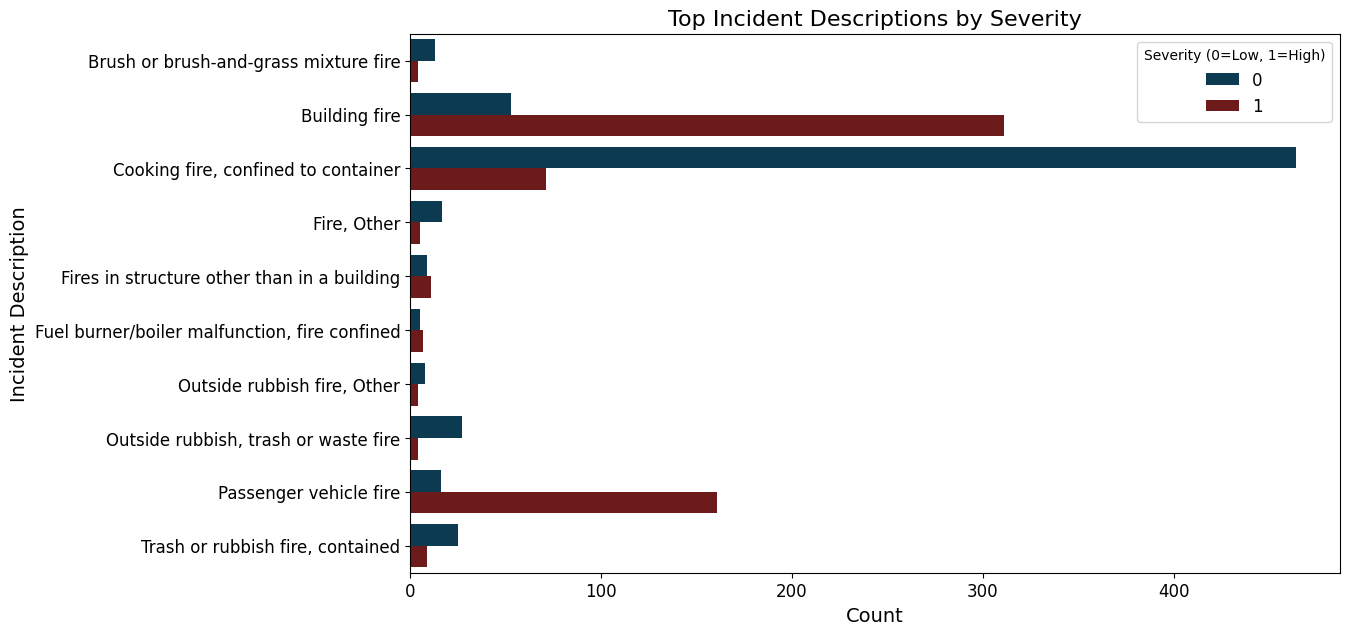

In [34]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from collections import Counter

# Decode incident_type for visualization
df_sample["incident_type_decoded"] = label_encoders["incident_description"].inverse_transform(df_sample["incident_description"])

# Get the top 10 most frequent incident descriptions
top_incidents = df_sample["incident_type_decoded"].value_counts().index[:10]

# Aggregate count by severity
incident_counts = df_sample[df_sample["incident_type_decoded"].isin(top_incidents)]
incident_counts = incident_counts.groupby(["incident_type_decoded", "severity"]).size().reset_index(name="count")

# Define darker color palette
dark_palette = ["#003f5c", "#7a0c0c"]  # Dark blue for Low, Dark red for High

# Improved Horizontal Bar Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=incident_counts,
    y="incident_type_decoded",
    x="count",
    hue="severity",
    palette=dark_palette
)

plt.xlabel("Count", fontsize=14)
plt.ylabel("Incident Description", fontsize=14)
plt.title("Top Incident Descriptions by Severity", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Severity (0=Low, 1=High)", fontsize=12)

plt.show()

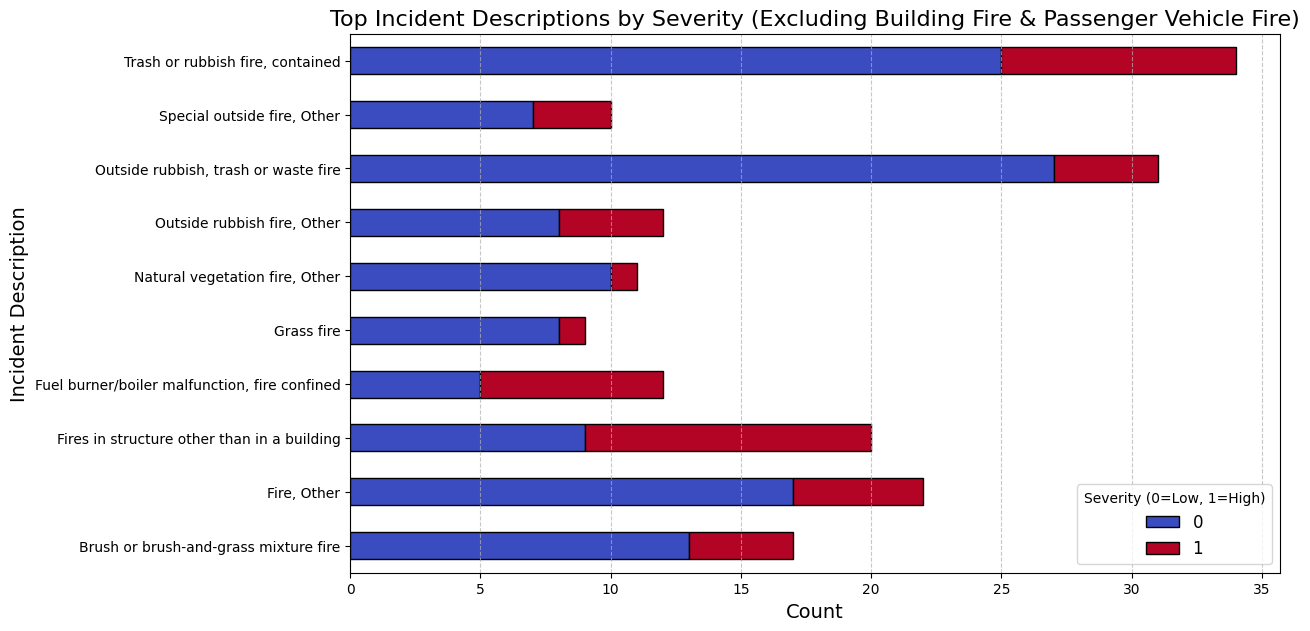

In [35]:
# Decode incident_type for visualization
df_sample["incident_type_decoded"] = label_encoders["incident_description"].inverse_transform(df_sample["incident_description"])

# Exclude "Building Fire" and "Passenger Vehicle Fire"
excluded_incidents = ["Building fire", "Passenger vehicle fire", "Cooking fire, confined to container"]
df_filtered = df_sample[~df_sample["incident_type_decoded"].isin(excluded_incidents)]

# Get the top 10 most frequent remaining incident descriptions
top_incidents = df_filtered["incident_type_decoded"].value_counts().index[:10]
df_top_filtered = df_filtered[df_filtered["incident_type_decoded"].isin(top_incidents)]

# Aggregate count by severity
incident_counts = df_top_filtered.groupby(["incident_type_decoded", "severity"]).size().unstack().fillna(0)

# Plot Bar Chart for Remaining Incidents
incident_counts.plot(kind="barh", stacked=True, figsize=(12, 7), colormap="coolwarm", edgecolor="black")

plt.xlabel("Count", fontsize=14)
plt.ylabel("Incident Description", fontsize=14)
plt.title("Top Incident Descriptions by Severity (Excluding Building Fire & Passenger Vehicle Fire)", fontsize=16)
plt.legend(title="Severity (0=Low, 1=High)", fontsize=12)

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [38]:
# Plot ROC Curve
def plot_roc_curve(y_test, y_pred_probs):
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

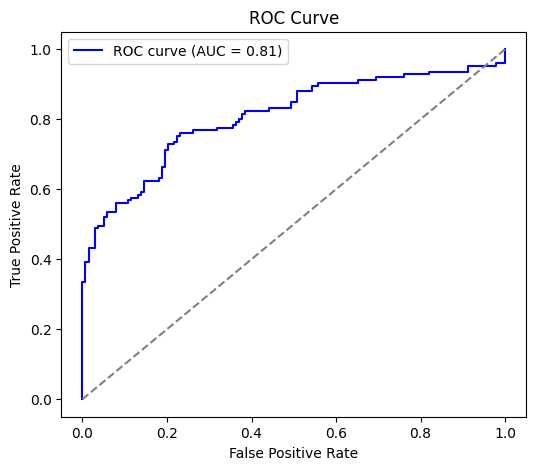

In [39]:
# Generate predictions and probabilities
y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_pred_probs)

SIMIN CODE

In [ ]:
from Capstone_Group7 import load_data, preprocess_data, split_data, analyze_high_loss

# Load dataset
df = load_data("Users/baibai/Desktop/Dataset.csv")

# Preprocess data
df = preprocess_data(df)

# Split data
X_train, X_test, y_train, y_test = split_data(df)

# Analyze high-loss events
analyze_high_loss(df)

# Display first few rows
df.head()


In [ ]:
from Capstone_Group7 import save_cleaned_data, encode_categorical_columns

# Encode categorical variables
df, label_encoders = encode_categorical_columns(df)

# Save cleaned dataset
save_cleaned_data(df)

In [ ]:
from Capstone_Group7 import check_non_numeric_columns

check_non_numeric_columns(X_train)


In [ ]:
from Capstone_Group7 import encode_categorical_columns

df, label_encoders = encode_categorical_columns(df)


In [ ]:
def check_data_types(X_train, X_test):
    print("🔍 Checking data types for training and testing sets...")
    print("\nX_train dtypes:\n", X_train.dtypes)
    print("\nX_test dtypes:\n", X_test.dtypes)

check_data_types(X_train, X_test)


In [ ]:
from Capstone_Group7 import encode_categorical_columns

X_train, X_test = encode_categorical_columns(X_train, X_test)


In [ ]:
from Capstone_Group7 import encode_single_column

X_train, X_test = encode_single_column(X_train, X_test, "street_number")

print(X_train.dtypes)
print(X_test.dtypes)

In [ ]:
from Capstone_Group7 import load_data, preprocess_data, split_data, train_model, evaluate_model

df, label_encoders = preprocess_data(df)

X_train, X_test, y_train, y_test = split_data(df)

model = train_model(X_train, y_train)

accuracy, report = evaluate_model(model, X_test, y_test)

print(f"✅ Model Accuracy: {accuracy:.4f}")
print("\n📌 Classification Report:\n", report)

In [ ]:
from Capstone_Group7 import train_tuned_model, evaluate_tuned_model

tuned_model = train_tuned_model(X_train, y_train)

tuned_accuracy, tuned_report = evaluate_tuned_model(tuned_model, X_test, y_test)

print(f"✅ Tuned Model Accuracy: {tuned_accuracy:.4f}")
print("\n📌 Tuned Classification Report:\n", tuned_report)


In [ ]:
from Capstone_Group7 import cross_validate_model, encode_incident_type

mean_cv_accuracy = cross_validate_model(rf_tuned, X_train, y_train, cv=5)

df, incident_mapping = encode_incident_type(df)


In [ ]:
from Capstone_Group7 import load_data, preprocess_data, split_data, train_and_evaluate

df = preprocess_data(df)

X_train, X_test, y_train, y_test = split_data(df)

model = train_and_evaluate(X_train, X_test, y_train, y_test)


In [ ]:

feature_importances = compute_feature_importance(rf_tuned, X_train)

print(feature_importances.head(10))

print(len(X_train.columns)) 
print(len(rf_tuned.feature_importances_)) 

print(feature_importances.shape)


In [ ]:

from Capstone_Group7 import load_data, preprocess_data, train_model, plot_feature_importance

df, label_encoders = preprocess_data(df)

model, X_train, X_test, y_train, y_test = train_model(df)

plot_feature_importance(model, X_train)


In [ ]:
X_train, X_test, y_train, y_test = split_data(df)

rf_model = train_model(X_train, y_train)

accuracy, report = evaluate_model(rf_model, X_test, y_test)
print(f"✅ Model Accuracy: {accuracy:.4f}")
print("\n🔷 Classification Report:")
print(report)

feature_importances = get_feature_importance(rf_model, X_train)

plot_feature_importance(feature_importances)


YONGXIN CODE

In [ ]:
# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')
print(df.head())
# Count the number of unique neighborhoods in the dataset
num_unique_neighborhoods = df["Neighborhood"].nunique()

# Display the result
num_unique_neighborhoods


In [ ]:
import pandas as pd
from IPython.display import display

# Assume df is your DataFrame
neighborhood_counts = df["Neighborhood"].value_counts().reset_index()
neighborhood_counts.columns = ["Neighborhood", "Count"]

# Display the DataFrame
display(neighborhood_counts)

# Count occurrences of each Neighborhood
neighborhood_counts = df["Neighborhood"].value_counts().reset_index()
neighborhood_counts.columns = ["Neighborhood", "NeighborhoodCount"]

# Load the original neighborhood counts CSV file
csv_file_path = "Neighborhood_Counts.csv"
neighborhood_counts_df = pd.read_csv('cleaned_data.csv')

# Convert neighborhood names to lowercase for consistency
neighborhood_counts_df["Neighborhood"] = neighborhood_counts_df["Neighborhood"].str.lower()




In [ ]:
import piplite
await piplite.install('plotly')
import plotly.express as px
import plotly.graph_objects as go
import json
from IPython.display import display, HTML

# File paths
geojson_path = "boston.geojson"
data_path = "Updated_Neighborhood_Counts.csv"
output_html = "boston_neighborhood_map.html"  # Path to save the HTML file

# Read Neighborhood statistics data
df = pd.read_csv(data_path)

# Ensure column names match
print("Columns:", df.columns)  # Check column names
df.rename(columns={'neighborhood': 'Neighborhood', 'count': 'NeighborhoodCount'}, inplace=True)

# Read Boston GeoJSON map data
with open(geojson_path) as f:
    boston_geojson = json.load(f)

# Generate the Choropleth map
fig = go.Figure(go.Choropleth(
    geojson=boston_geojson,  # Use GeoJSON data
    locations=df["Neighborhood"],  # Bind the region names from CSV
    z=df["NeighborhoodCount"],  # Color data
    featureidkey="properties.Name",  # Region field in GeoJSON
    colorscale="Viridis",
    marker_line_color="black",
    marker_line_width=0.5
))

# Set map layout
fig.update_layout(
    title="Boston Neighborhood Data Distribution",
    geo=dict(
        center={"lat": 42.3601, "lon": -71.0589},
        projection_scale=50,  # Adjust zoom level
        visible=False  # Hide base map (JupyterLite does not support Mapbox)
    )
)

# Save as an HTML file
fig.write_html(output_html)

print(f"Map saved successfully as: {output_html}")



In [ ]:
import pandas as pd

# Read the CSV file and specify the data type explicitly or use low_memory=False
df = pd.read_csv('tmpv7df_vk5.csv', low_memory=False)

# Rename a column
df = df.rename(columns={
    'incident_number': 'IncidentID',
    'alarm_date': 'Date',
    'alarm_time': 'Time',
    'incident_type': 'IncidentType',
    'incident_description': 'Description',
    'estimated_property_loss': 'PropertyLoss',
    'estimated_content_loss': 'ContentLoss',
    'district': 'District',
    'city_section': 'CitySection',
    'neighborhood': 'Neighborhood',
    'zip': 'ZipCode',
    'property_use': 'PropertyUse',
    'property_description': 'PropertyDescription',
    'street_number': 'StreetNumber',
    'street_prefix': 'StreetPrefix',
    'street_name': 'StreetName',
    'street_suffix': 'StreetSuffix',
    'street_type': 'StreetType',
    'address_2': 'Address2',
    'xstreet_prefix': 'CrossStreetPrefix',
    'xstreet_name': 'CrossStreetName',
    'xstreet_suffix': 'CrossStreetSuffix',
    'xstreet_type': 'CrossStreetType'
})

# Fill in missing values
df['PropertyLoss'] = df['PropertyLoss'].fillna(0.0000)
df['ContentLoss'] = df['ContentLoss'].fillna(0.0000)
df['StreetNumber'] = df['StreetNumber'].fillna("")
df['StreetPrefix'] = df['StreetPrefix'].fillna("")
df['StreetSuffix'] = df['StreetSuffix'].fillna("")
df['PropertyUse'] = df['PropertyUse'].fillna("Unknown")
df['PropertyDescription'] = df['PropertyDescription'].fillna("Unknown")

# Select a subset of the relevant columns
df = df[['IncidentID', 'Date', 'Time', 'IncidentType', 'Description', 'PropertyLoss', 'ContentLoss', 'District', 'CitySection', 'Neighborhood', 'ZipCode', 'PropertyUse', 'PropertyDescription', 'StreetNumber', 'StreetName', 'StreetType']]

# Delete the missing IncidentID lines
df = df.dropna(subset=['IncidentID'])

# Fill in the missing values for the Date and Time columns
df['Date'] = df['Date'].fillna("Unknown")
df['Time'] = df['Time'].fillna("Unknown")

# Convert data type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time
df['PropertyLoss'] = df['PropertyLoss'].astype(float)
df['ContentLoss'] = df['ContentLoss'].astype(float)
df['IncidentType'] = df['IncidentType'].astype('category')

# Cleans up the District column and converts it to an integer
df['District'] = pd.to_numeric(df['District'], errors='coerce')  # Replace a non-numeric value with NaN
df['District'] = df['District'].fillna(0).astype(int)  # Fill in missing values and convert to integers

# Create a new column
df['FullAddress'] = df['StreetNumber'] + ' ' + df['StreetName'] + ' ' + df['StreetType']
df['TotalLoss'] = df['PropertyLoss'] + df['ContentLoss']

# Imputation of responsibility
df['IncidentType'] = df['IncidentType'].fillna(df['IncidentType'].mode()[0])

# Text cleaning
df['Description'] = df['Description'].str.replace(r'[^\w\s]+', '', regex=True).str.strip()
df['PropertyDescription'] = df['PropertyDescription'].str.replace(r'[^\w\s]+', '', regex=True).str.strip()

# Save the cleaned data
df.to_csv('cleaned_data.csv', index=False)

import pandas as pd

# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')
print(df.head())

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Merge the Date and Time columns to create a timestamp
df['Timestamp'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Extract more temporal features
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month
df['DayOfYear'] = df['Timestamp'].dt.dayofyear
df['WeekOfYear'] = df['Timestamp'].dt.isocalendar().week

# Text Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer(max_features=50) # Extract the 50 most important text features
text_features = tfidf.fit_transform(df['Description'].fillna('')).toarray()
text_feature_names = [f'TFIDF_{i}' for i in range(text_features.shape[1])]
df[text_feature_names] = text_features

# Select the characteristics and target variables
features = ['Hour', 'DayOfWeek', 'Month', 'DayOfYear', 'WeekOfYear', 'PropertyLoss', 'ContentLoss'] + text_feature_names
target = 'IncidentType'

# Standardized characteristics
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# The target variable was coded as a numerical value
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[target])

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, num_heads=4, num_layers=2, dim_feedforward=128, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, dim_feedforward)
        self.dropout = nn.Dropout(dropout)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=dim_feedforward, nhead=num_heads, dim_feedforward=dim_feedforward, dropout=dropout, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = self.transformer(x)
        x = self.fc(x.mean(dim=1))
        return x

# Initialize the model
model = TransformerModel(input_dim=X_train.shape[1], num_classes=len(label_encoder.classes_))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Learning rate scheduler

# Training the model
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(TimeSeriesDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TimeSeriesDataset(X_test, y_test), batch_size=32, shuffle=False)

for epoch in range(20):  # Train 20 epochs
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X.unsqueeze(1))  # Add a time dimension
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    scheduler.step()  # Update the learning rate
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Test model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X.unsqueeze(1))
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()
print(f'Test Accuracy: {100 * correct / total:.2f}%')
torch.save(model, './model.pth')

# Save the model
torch.save(model.state_dict(), './model.pth')

# Model of loading
model = TransformerModel(input_dim=X_train.shape[1], num_classes=len(label_encoder.classes_))
model.load_state_dict(torch.load('./model.pth'))
model.eval()
import matplotlib.pyplot as plt
import seaborn as sns

# Forecast fire occurrence trends for the next year
def predict_fire_trend(model, scaler, label_encoder, features, start_date, end_date, location):
    # Generation date range
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')

    # Creating predictive data
    prediction_data = pd.DataFrame({
        'Timestamp': date_range,
        'Hour': date_range.hour,
        'DayOfWeek': date_range.dayofweek,
        'Month': date_range.month,
        'DayOfYear': date_range.dayofyear,
        'WeekOfYear': date_range.isocalendar().week,
        'PropertyLoss': 0,
        'ContentLoss': 0,
        'Location': location
    })

    # Add text features (assume all zeros)
    text_features = np.zeros((len(date_range), len(text_feature_names)))
    prediction_data[text_feature_names] = text_features

    # Standardized characteristics
    X_pred = scaler.transform(prediction_data[features])

    # Forecasting
    with torch.no_grad():
        X_pred_tensor = torch.tensor(X_pred, dtype=torch.float32).unsqueeze(1)
        outputs = model(X_pred_tensor)
        _, predicted = torch.max(outputs, 1)

    # Decode prediction results
    predicted_labels = label_encoder.inverse_transform(predicted.numpy())

    # Statistical prediction results
    prediction_data['PredictedIncidentType'] = predicted_labels
    monthly_trend = prediction_data.groupby('Month').size()
    seasonal_trend = prediction_data.groupby(prediction_data['Timestamp'].dt.quarter).size()

    return monthly_trend, seasonal_trend


# Forecast fire trends in 2025
start_date = '2025-01-01'
end_date = '2025-12-31'
location = 'SomeLocation'
monthly_trend, seasonal_trend = predict_fire_trend(model, scaler, label_encoder, features, start_date, end_date,
                                                   location)

# The number of fires was counted by year
df['Year'] = df['Timestamp'].dt.year
yearly_fire_counts = df.groupby('Year').size()

# Charting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_fire_counts.index, y=yearly_fire_counts.values)
plt.title('Trend Analysis: Fire Incidents Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Fire Incidents')
plt.grid(True)
plt.show()

# Count the number of fires by month
df['Month'] = df['Timestamp'].dt.month
monthly_fire_counts = df.groupby('Month').size()

# Mapping the seasonality
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_fire_counts.index, y=monthly_fire_counts.values)
plt.title('Seasonal Analysis: Fire Incidents Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Fire Incidents')
plt.grid(True)
plt.show()


